In [1]:
!pip install diffusers transformers accelerate safetensors
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121  # adjust for your CUDA version
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [2]:
import cv2
import numpy as np
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from PIL import Image
import gc
import numpy as np
import matplotlib.pyplot as plt

In [25]:
torch.cuda.empty_cache()
torch.cuda.ipc_collect()
gc.collect()
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

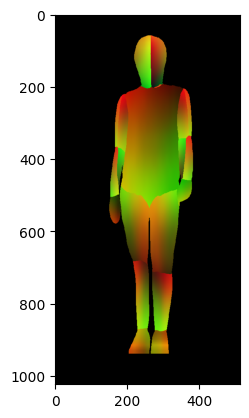

  0%|          | 0/50 [00:00<?, ?it/s]

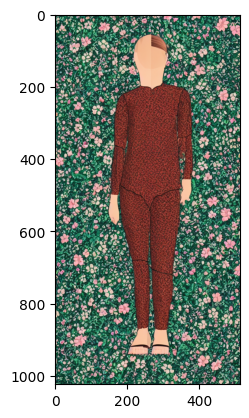

In [26]:
# Load models
base_model_id = "runwayml/stable-diffusion-v1-5"
controlnet_id = "lllyasviel/sd-controlnet-depth"

controlnet = ControlNetModel.from_pretrained(controlnet_id, torch_dtype=torch.float32)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_id, controlnet=controlnet, torch_dtype=torch.float32
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

# Load control image correctly
control_image = cv2.imread('/content/WOMEN-Blouses_Shirts-id_00001719-01_4_full_densepose.png')
if control_image is None:
    raise ValueError("Failed to load control image. Check the file path.")

control_image = cv2.cvtColor(control_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
control_image_pil = Image.fromarray(control_image)

plt.imshow(control_image_pil)
plt.show()


image = pipe("A beautiful woman wearing a floral dress, highly detailed, realistic lighting, photorealistic, intricate patterns, high quality", control_image_pil, num_inference_steps=50).images[0]

plt.imshow(image)
plt.show()


# Stable Diffusion Generation Process

## SD1.5

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

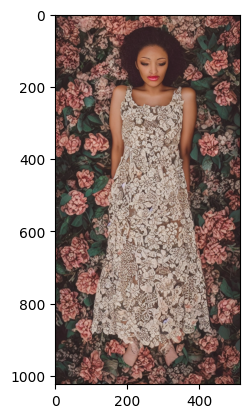

In [38]:
base_model_id = "runwayml/stable-diffusion-v1-5"
# controlnet_id = "xinsir/controlnet-openpose-sdxl-1.0"
controlnet_id = "lllyasviel/control_v11p_sd15_openpose"  # SD 1.5 compatible OpenPose ControlNet

controlnet = ControlNetModel.from_pretrained(controlnet_id, torch_dtype=torch.float32)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_id, controlnet=controlnet, torch_dtype=torch.float32
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

image = pipe(
    "A beautiful woman wearing a floral dress, highly detailed, realistic lighting, photorealistic, intricate patterns, high quality",
    control_image_pil,
    num_inference_steps=50
).images[0]

plt.imshow(image)
plt.show()

##SDXL

have CUDA memory problems!

In [46]:
torch.cuda.empty_cache()
torch.cuda.ipc_collect()
gc.collect()
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

In [43]:
# Load models
base_model_id = "runwayml/stable-diffusion-v1-5"
controlnet_id = "xinsir/controlnet-openpose-sdxl-1.0"

base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
controlnet = ControlNetModel.from_pretrained(controlnet_id, torch_dtype=torch.float32)
pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
    base_model_id, controlnet=controlnet, torch_dtype=torch.float32
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

image = pipe(
    "A beautiful woman wearing a floral dress, highly detailed, realistic lighting, photorealistic, intricate patterns, high quality",
    control_image_pil,
    num_inference_steps=50
).images[0]

plt.imshow(image)
plt.show()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 22.16 GiB of which 3.38 MiB is free. Process 9896 has 22.15 GiB memory in use. Of the allocated memory 21.57 GiB is allocated by PyTorch, and 325.52 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

## SD1.5+openpose

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

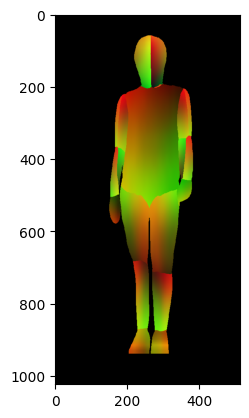

  0%|          | 0/30 [00:00<?, ?it/s]

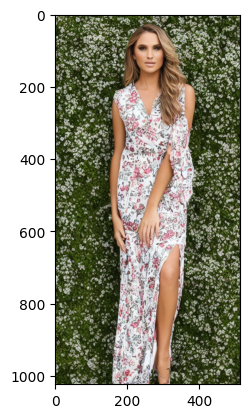

In [49]:
base_model_id = "runwayml/stable-diffusion-v1-5"
controlnet_id = "lllyasviel/sd-controlnet-openpose"

controlnet = ControlNetModel.from_pretrained(controlnet_id, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_id, controlnet=controlnet, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

# Load your control image (as PIL image)
control_image_pil = Image.fromarray(control_image)
# print(type(control_image), control_image.shape)
plt.imshow(control_image_pil)
plt.show()

# Prompt
negative_prompt = "blurry, distorted, unrealistic, color"
prompt = "A beautiful woman wearing a floral dress, highly detailed, realistic lighting, photorealistic, intricate patterns, high quality"
# Run inference
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    image=control_image_pil,
    # controlnet_conditioning_image=[control_image_pil]
).images[0]

plt.imshow(image)
plt.show()


# Test with Openpose

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

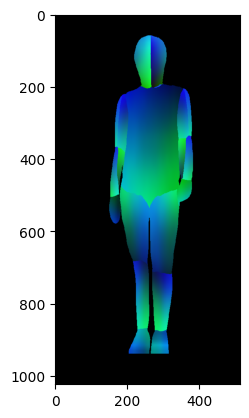

  0%|          | 0/100 [00:00<?, ?it/s]

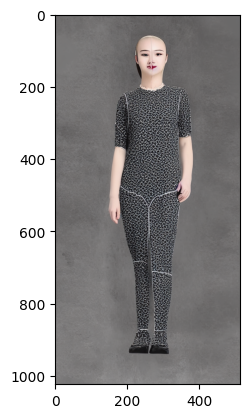

In [12]:
# Load models
base_model_id = "runwayml/stable-diffusion-v1-5"
controlnet_id = "lllyasviel/sd-controlnet-depth"

controlnet = ControlNetModel.from_pretrained(controlnet_id, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_id, controlnet=controlnet, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")  # or "mps" for Mac

# Load your control image (as PIL image)
control_image = cv2.imread('/content/WOMEN-Blouses_Shirts-id_00001719-01_4_full_densepose.png')
control_image_pil = Image.fromarray(control_image)

plt.imshow(control_image_pil)
plt.show()

# Prompt
prompt = "generate a women with floral dress"
negative_prompt = "blurry, distorted, unrealistic, color"

# Run inference
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=100,
    guidance_scale=7.5,
    image=control_image_pil,
    # controlnet_conditioning_image=[control_image_pil]
).images[0]

plt.imshow(image)
plt.show()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

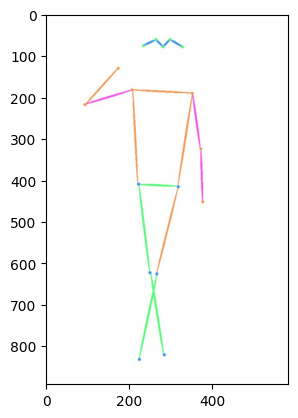

  0%|          | 0/50 [00:00<?, ?it/s]

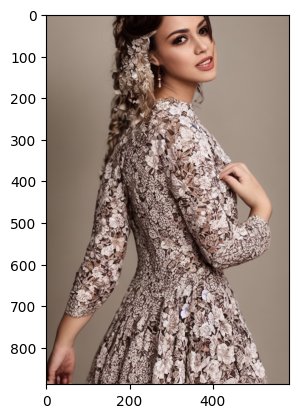

In [51]:
# Load models
base_model_id = "runwayml/stable-diffusion-v1-5"
controlnet_id = "lllyasviel/sd-controlnet-openpose"

controlnet = ControlNetModel.from_pretrained(controlnet_id, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_id, controlnet=controlnet, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

# Load your control image (as PIL image)
# control_image = draw_keypoints_image(keypoints)  # from earlier
control_image = cv2.imread('/content/example1.jpg')
control_image_pil = Image.fromarray(control_image)

plt.imshow(control_image_pil)
plt.show()

# Prompt
prompt = "A beautiful woman wearing a floral dress, highly detailed, realistic lighting, photorealistic, intricate patterns, high quality"
negative_prompt = "blurry, distorted, unrealistic, color"

# Run inference
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=50,
    guidance_scale=7.5,
    image=control_image_pil,
    # controlnet_conditioning_image=[control_image_pil]
).images[0]

plt.imshow(image)
plt.show()

# Finetuning

In [ ]:
import os
import torch
import cv2
import numpy as np
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as T
from diffusers import ControlNetModel, DDPMScheduler
import shutil


In [30]:
!pip install controlnet_aux

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 32.0 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 1.0.15
    Uninstalling timm-1.0.15:
      Successfully uninstalled timm-1.0.15


In [33]:
from diffusers import ControlNetModel, StableDiffusionXLControlNetPipeline, AutoencoderKL
from diffusers import DDIMScheduler, EulerAncestralDiscreteScheduler
from controlnet_aux import OpenposeDetector
from PIL import Image
import torch
import numpy as np
import cv2

controlnet_conditioning_scale = 1.0
prompt = "A beautiful woman wearing a floral dress, highly detailed, realistic lighting, photorealistic, intricate patterns, high quality"
negative_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality'

eulera_scheduler = EulerAncestralDiscreteScheduler.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", subfolder="scheduler")


controlnet = ControlNetModel.from_pretrained(
    "xinsir/controlnet-openpose-sdxl-1.0",
    torch_dtype=torch.float16
)

# when test with other base model, you need to change the vae also.
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)


pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    controlnet=controlnet,
    vae=vae,
    safety_checker=None,
    torch_dtype=torch.float16,
    scheduler=eulera_scheduler,
)

processor = OpenposeDetector.from_pretrained('lllyasviel/ControlNet')


controlnet_img = cv2.imread("/content/example1.jpg")
controlnet_img = processor(controlnet_img, hand_and_face=False, output_type='cv2')


# need to resize the image resolution to 1024 * 1024 or same bucket resolution to get the best performance
height, width, _  = controlnet_img.shape
ratio = np.sqrt(1024. * 1024. / (width * height))
new_width, new_height = int(width * ratio), int(height * ratio)
controlnet_img = cv2.resize(controlnet_img, (new_width, new_height))
controlnet_img = Image.fromarray(controlnet_img)

images = pipe(
    prompt,
    negative_prompt=negative_prompt,
    image=controlnet_img,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    width=new_width,
    height=new_height,
    num_inference_steps=30,
    ).images

images[0].save(f"/content/example1_result.png")


Keyword arguments {'safety_checker': None} are not expected by StableDiffusionXLControlNetPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

KeyboardInterrupt: 